In [3]:
import os
print(os.listdir("../input/"))

['test', 'train', 'train.csv', 'sample_submission.csv']


In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

In [6]:
print("PyTorch version - ", torch.__version__)
print("Cuda version - ", torch.version.cuda)
print("cuDNN version - ", torch.backends.cudnn.version())
print("Device - ", torch.device("cuda:0"))
print("python PIL version - ", PIL.PILLOW_VERSION)

PyTorch version -  1.0.1.post2
Cuda version -  None
cuDNN version -  None
Device -  cuda:0
python PIL version -  5.1.0


In [7]:
!nvidia-smi

/bin/sh: 1: nvidia-smi: not found


In [8]:
batch_size = 64

In [9]:
data_path = "../input/"
data_path_train = data_path + "train/train/"
data_path_test = data_path + "test/test/"

In [10]:
df_train = pd.read_csv(data_path + "train.csv")
df_test = pd.read_csv(data_path + "sample_submission.csv")

In [11]:
df_train.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [12]:
data = ImageDataBunch.from_df(data_path_train, df_train, ds_tfms=get_transforms(), bs=batch_size).normalize(imagenet_stats)

In [13]:
data.add_test(ImageList.from_df(df_test, path=data_path_test))

In [14]:
data

ImageDataBunch;

Train: LabelList (14000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
1,1,1,0,1
Path: ../input/train/train;

Valid: LabelList (3500 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
1,1,1,1,1
Path: ../input/train/train;

Test: LabelList (4000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: ../input/train/train

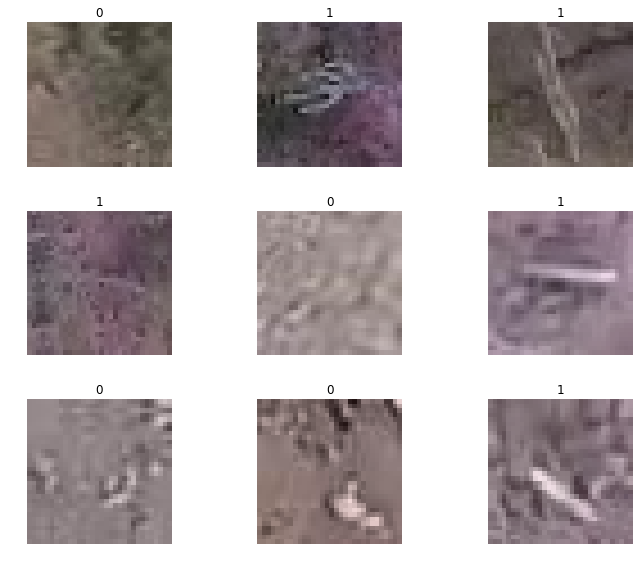

In [15]:
data.show_batch(rows = 3, figsize = (10,8))

In [16]:
print(data.classes)

[0, 1]


In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
87306240it [00:04, 20885329.32it/s]


In [19]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._h

KeyboardInterrupt: 

In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

### Predictions

In [ ]:
predictions = learn.get_preds(ds_type=DatasetType.Test)[0]

In [ ]:
predictions[0]

In [ ]:
predictions[:10]

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
predicted_classes[:10]

In [ ]:
df_test['has_cactus'] = predicted_classes
df_test.head(10)

### Create Submission File

In [ ]:
from datetime import datetime
time_format = "%Y%m%d-%H%M%S.%f"
time_stamp = datetime.now().strftime(time_format)
file_path = "{0}submission_{1}.csv".format(data_path, datetime.now().strftime(time_format))
                                        
print("Exporting Submission file with {0} rows at {1}".format(df_test.shape[0], file_path))

df_test.to_csv(file_path, index = False)